In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
df_acd = pd.read_csv('account_dat.csv')
df_iad = pd.read_csv('in-app_dat.csv')
df_ad = pd.read_csv('app_dat.csv')
df_dr = pd.read_csv('device_ref.csv')
df_cr = pd.read_csv('category_ref.csv')
#df_trd = pd.read_csv('transaction_dat.csv')

In [13]:
df_acd[['acct_id','payment_type']].head()

,acct_id,payment_type
0,eb23e449d274bddb,PMOF
1,3d60dcb8494a0d70,PMOF
2,9b6d6fbf76504d85,PMOF
3,343255370828b380,PMOF
4,664e27f05189c387,PMOF


In [3]:
#df_trd[(df_trd['device_id'] == 1)] |  #could be use for filtering
df_trd['price']>10

0           True
1          False
2          False
3          False
4           True
           ...  
3607504     True
3607505    False
3607506    False
3607507    False
3607508     True
Name: price, Length: 3607509, dtype: bool

In [4]:
df_trd['device_id'].isnull().value_counts() 

False    3607509
Name: device_id, dtype: int64

In [5]:
# Sort out Na
df_trd[df_trd['device_id'].isnull()]  #good! Thers is not na in this five columns

,create_dt,content_id,acct_id,price,device_id


In [6]:
# Group by certain features, just like select sex, count(*) from tips group by sex in mysql
df_trd.groupby('price').size()
#df_trd.groupby('price').count() #thats why we should use size in this scenario while we only want one column of aggregated return

price
0.00     1302194
0.99      332492
1.99      255790
2.99      204189
3.99      173033
4.99      131962
5.99      110628
6.99      110397
7.99       97863
8.99      107845
9.99       77249
10.99      73753
11.99      78908
12.99      52314
13.99      51855
14.99      54390
15.99      44749
16.99      42124
17.99      45096
18.99      36202
19.99      35044
20.99      28044
21.99      23722
22.99      21796
23.99      22256
24.99      23241
25.99      12305
26.99      18851
27.99      12899
28.99      18105
29.99       8213
dtype: int64

In [7]:
#just like what we did in mysql, select create_dt, avg(price), count(*) from tips group by crete_dt
df_trd.groupby('create_dt').agg({'price':np.mean , 'create_dt':np.size})

,price,create_dt
create_dt,,
2016-06-01,5.420273,31203
2016-06-02,5.403014,31058
2016-06-03,5.458368,30980
2016-06-04,5.522420,32569
2016-06-05,5.566952,32717
...,...,...
2016-09-17,5.173619,35155
2016-09-18,5.184895,35149
2016-09-19,5.024619,33864


In [8]:
#groupby based on multiple features select smoker, day, avg(tip), count(*) from tips group by smoker, day
df_trd.groupby(['device_id','create_dt']).agg({'price': [np.mean,np.size]})

price         
                          mean     size
device_id create_dt                    
1         2016-06-01  5.454255  22568.0
          2016-06-02  5.416377  22542.0
          2016-06-03  5.468795  22433.0
          2016-06-04  5.543844  23669.0
          2016-06-05  5.558927  23691.0
...                        ...      ...
2         2016-09-17  5.007601   9805.0
          2016-09-18  5.027443   9750.0
          2016-09-19  4.809483   9305.0
          2016-09-20  4.910205   9326.0
          2016-09-21  4.838639   9209.0

[220 rows x 2 columns]

In [9]:
#combine content_id from either inapp or app table into one. First we should pick all the content_id out
df = df_ad['content_id']
df1 = df_iad['content_id']

In [10]:
df = pd.DataFrame(df, columns =['content_id'])
df['Status'] = 'App'
df.head()

,content_id,Status
0,22dfac9721b899cb,App
1,7c645810cd7f166e,App
2,c495bcb878faffaa,App
3,4e683dcd461cdd22,App
4,6473dd29a2badbf1,App


In [11]:
df1 = pd.DataFrame(df1, columns =['content_id'])
df1['Status'] = 'In_app'
df1.head()

,content_id,Status
0,227227a77c59809b,In_app
1,41ac2362a2600185,In_app
2,64a8e16f030bb611,In_app
3,2c8ba424183afa7c,In_app
4,b4c42fa5cc420f7b,In_app


In [12]:
df_all_id = pd.concat([df, df1],ignore_index=True)

In [13]:
df_all_id #union the two table

,content_id,Status
0,22dfac9721b899cb,App
1,7c645810cd7f166e,App
2,c495bcb878faffaa,App
3,4e683dcd461cdd22,App
4,6473dd29a2badbf1,App
...,...,...
3371,94d5222c3c6d70c1,In_app
3372,b31f6cb5dc93cbee,In_app
3373,6f33c637ba6c5f08,In_app
3374,23fd6df55dda9206,In_app


In [20]:
#lets create another column called parent_content_id and we need to use to in_app table, because there are both parent_id and sub_item id
df2 = pd.merge(df_all_id,df_iad,how = 'left',on='content_id')
df2


,content_id,Status,parent_app_content_id,type
0,22dfac9721b899cb,App,NaN,NaN
1,7c645810cd7f166e,App,NaN,NaN
2,c495bcb878faffaa,App,NaN,NaN
3,4e683dcd461cdd22,App,NaN,NaN
4,6473dd29a2badbf1,App,NaN,NaN
...,...,...,...,...
3371,94d5222c3c6d70c1,In_app,aeb6c61b244fba5b,consumable
3372,b31f6cb5dc93cbee,In_app,81f5dda105837b6e,subscription
3373,6f33c637ba6c5f08,In_app,81f5dda105837b6e,subscription
3374,23fd6df55dda9206,In_app,81f5dda105837b6e,subscription


In [21]:
df2.loc[df2.Status == 'App','parent_app_content_id'] = df2['content_id']
df2.isnull().any(axis=0)

content_id               False
Status                   False
parent_app_content_id    False
type                      True
dtype: bool

In [138]:
df2 #now we done with the nan replace

,content_id,Status,parent_app_content_id
0,22dfac9721b899cb,App,22dfac9721b899cb
1,7c645810cd7f166e,App,7c645810cd7f166e
2,c495bcb878faffaa,App,c495bcb878faffaa
3,4e683dcd461cdd22,App,4e683dcd461cdd22
4,6473dd29a2badbf1,App,6473dd29a2badbf1
...,...,...,...
3371,94d5222c3c6d70c1,In_app,aeb6c61b244fba5b
3372,b31f6cb5dc93cbee,In_app,81f5dda105837b6e
3373,6f33c637ba6c5f08,In_app,81f5dda105837b6e
3374,23fd6df55dda9206,In_app,81f5dda105837b6e


In [17]:
df_ad.head()

,app_name,content_id,category_id,device_id
0,half-slouched having,22dfac9721b899cb,Y-8,3
1,lift whale-ships,7c645810cd7f166e,M-7,3
2,mightily community,c495bcb878faffaa,Y-8,2
3,session: too--shall,4e683dcd461cdd22,Y-8,1
4,That Zoology,6473dd29a2badbf1,Y-8,3


In [18]:
#Then lets join the union table back to app table to get the app related features 
df3 = pd.merge(df2,df_ad,left_on = 'parent_app_content_id',right_on = 'content_id')
df3

,content_id_x,Status,parent_app_content_id,type,app_name,content_id_y,category_id,device_id
0,22dfac9721b899cb,App,22dfac9721b899cb,NaN,half-slouched having,22dfac9721b899cb,Y-8,3
1,f049e141e84edd84,In_app,22dfac9721b899cb,consumable,half-slouched having,22dfac9721b899cb,Y-8,3
2,7c645810cd7f166e,App,7c645810cd7f166e,NaN,lift whale-ships,7c645810cd7f166e,M-7,3
3,ef891bdc2d651c70,In_app,7c645810cd7f166e,consumable,lift whale-ships,7c645810cd7f166e,M-7,3
4,c495bcb878faffaa,App,c495bcb878faffaa,NaN,mightily community,c495bcb878faffaa,Y-8,2
...,...,...,...,...,...,...,...,...
3371,71cc78b6addcdc63,App,71cc78b6addcdc63,NaN,animals nights--do,71cc78b6addcdc63,Q-1,3
3372,42e45e59e6d3dcf1,App,42e45e59e6d3dcf1,NaN,meeting-house? respond,42e45e59e6d3dcf1,Y-8,3
3373,d862535438d4314c,App,d862535438d4314c,NaN,--SIBBALD'S occupation,d862535438d4314c,M-7,3
3374,07d53efa8e531e15,App,07d53efa8e531e15,NaN,cylinders vain!,07d53efa8e531e15,Y-8,3


In [22]:
df3.isnull().any(axis=0)#cool, no missing value

content_id_x             False
Status                   False
parent_app_content_id    False
type                      True
app_name                 False
content_id_y             False
category_id              False
device_id                False
dtype: bool

In [23]:
#drop the duplicated column
del df3['content_id_y']

In [24]:
df3

,content_id_x,Status,parent_app_content_id,type,app_name,category_id,device_id
0,22dfac9721b899cb,App,22dfac9721b899cb,NaN,half-slouched having,Y-8,3
1,f049e141e84edd84,In_app,22dfac9721b899cb,consumable,half-slouched having,Y-8,3
2,7c645810cd7f166e,App,7c645810cd7f166e,NaN,lift whale-ships,M-7,3
3,ef891bdc2d651c70,In_app,7c645810cd7f166e,consumable,lift whale-ships,M-7,3
4,c495bcb878faffaa,App,c495bcb878faffaa,NaN,mightily community,Y-8,2
...,...,...,...,...,...,...,...
3371,71cc78b6addcdc63,App,71cc78b6addcdc63,NaN,animals nights--do,Q-1,3
3372,42e45e59e6d3dcf1,App,42e45e59e6d3dcf1,NaN,meeting-house? respond,Y-8,3
3373,d862535438d4314c,App,d862535438d4314c,NaN,--SIBBALD'S occupation,M-7,3
3374,07d53efa8e531e15,App,07d53efa8e531e15,NaN,cylinders vain!,Y-8,3


In [25]:
#We need to join our syndicated table back to in_app_table to get extra information
df4 = pd.merge(df3,df_iad,how = 'left',left_on = 'parent_app_content_id',right_on = 'parent_app_content_id')
df4
#As we can see there are a lot of duplicated records

,content_id_x,Status,parent_app_content_id,type_x,app_name,category_id,device_id,content_id,type_y
0,22dfac9721b899cb,App,22dfac9721b899cb,NaN,half-slouched having,Y-8,3,f049e141e84edd84,consumable
1,f049e141e84edd84,In_app,22dfac9721b899cb,consumable,half-slouched having,Y-8,3,f049e141e84edd84,consumable
2,7c645810cd7f166e,App,7c645810cd7f166e,NaN,lift whale-ships,M-7,3,ef891bdc2d651c70,consumable
3,ef891bdc2d651c70,In_app,7c645810cd7f166e,consumable,lift whale-ships,M-7,3,ef891bdc2d651c70,consumable
4,c495bcb878faffaa,App,c495bcb878faffaa,NaN,mightily community,Y-8,2,107aece323e389df,consumable
...,...,...,...,...,...,...,...,...,...
24591,71cc78b6addcdc63,App,71cc78b6addcdc63,NaN,animals nights--do,Q-1,3,NaN,NaN
24592,42e45e59e6d3dcf1,App,42e45e59e6d3dcf1,NaN,meeting-house? respond,Y-8,3,NaN,NaN
24593,d862535438d4314c,App,d862535438d4314c,NaN,--SIBBALD'S occupation,M-7,3,NaN,NaN
24594,07d53efa8e531e15,App,07d53efa8e531e15,NaN,cylinders vain!,Y-8,3,NaN,NaN


In [26]:
#We should drop the duplicated parent_app_content_id to prevent from duplicated when we join df3 back to the in_app table
df_iad = df_iad.drop_duplicates(subset='parent_app_content_id', keep='first', inplace=False) 
df_iad

,parent_app_content_id,content_id,type
0,d2bde35599e0dae9,227227a77c59809b,consumable
17,47a405447e564935,2dd0a1e11324152b,subscription
20,dfb4b79ebaa2f9b2,1bdf7901eaa65ab1,consumable
22,cdddeb6475a8c261,d892d4bc63dd228a,subscription
25,cd850fd8019a657a,7a56163727c086a2,consumable
...,...,...,...
2340,86efc8b9e7477e69,089b1a8618b3f191,consumable
2345,63bdf4fc4b9ec169,e5751af008392cd8,subscription
2358,e8c13c46a8bc12fb,4cfe80b13380c056,subscription
2365,aeb6c61b244fba5b,f2c7ad8ea0458bfb,consumable


In [27]:
del df_iad['content_id']

In [28]:
df_iad

,parent_app_content_id,type
0,d2bde35599e0dae9,consumable
17,47a405447e564935,subscription
20,dfb4b79ebaa2f9b2,consumable
22,cdddeb6475a8c261,subscription
25,cd850fd8019a657a,consumable
...,...,...
2340,86efc8b9e7477e69,consumable
2345,63bdf4fc4b9ec169,subscription
2358,e8c13c46a8bc12fb,subscription
2365,aeb6c61b244fba5b,consumable


In [29]:
df2

,content_id,Status,parent_app_content_id,type
0,22dfac9721b899cb,App,22dfac9721b899cb,NaN
1,7c645810cd7f166e,App,7c645810cd7f166e,NaN
2,c495bcb878faffaa,App,c495bcb878faffaa,NaN
3,4e683dcd461cdd22,App,4e683dcd461cdd22,NaN
4,6473dd29a2badbf1,App,6473dd29a2badbf1,NaN
...,...,...,...,...
3371,94d5222c3c6d70c1,In_app,aeb6c61b244fba5b,consumable
3372,b31f6cb5dc93cbee,In_app,81f5dda105837b6e,subscription
3373,6f33c637ba6c5f08,In_app,81f5dda105837b6e,subscription
3374,23fd6df55dda9206,In_app,81f5dda105837b6e,subscription


In [30]:
#Then we can rejoin after we have removed the dupliactes.
df4 = pd.merge(df3,df_iad,how = 'left',left_on = 'parent_app_content_id',right_on = 'parent_app_content_id')
df4


,content_id_x,Status,parent_app_content_id,type_x,app_name,category_id,device_id,type_y
0,22dfac9721b899cb,App,22dfac9721b899cb,NaN,half-slouched having,Y-8,3,consumable
1,f049e141e84edd84,In_app,22dfac9721b899cb,consumable,half-slouched having,Y-8,3,consumable
2,7c645810cd7f166e,App,7c645810cd7f166e,NaN,lift whale-ships,M-7,3,consumable
3,ef891bdc2d651c70,In_app,7c645810cd7f166e,consumable,lift whale-ships,M-7,3,consumable
4,c495bcb878faffaa,App,c495bcb878faffaa,NaN,mightily community,Y-8,2,consumable
...,...,...,...,...,...,...,...,...
3371,71cc78b6addcdc63,App,71cc78b6addcdc63,NaN,animals nights--do,Q-1,3,NaN
3372,42e45e59e6d3dcf1,App,42e45e59e6d3dcf1,NaN,meeting-house? respond,Y-8,3,NaN
3373,d862535438d4314c,App,d862535438d4314c,NaN,--SIBBALD'S occupation,M-7,3,NaN
3374,07d53efa8e531e15,App,07d53efa8e531e15,NaN,cylinders vain!,Y-8,3,NaN


In [31]:
df4.isnull().any(axis=0) #that make sense because there are some apps that dont have inapp item and dont have 'type' within the inapp table

content_id_x             False
Status                   False
parent_app_content_id    False
type_x                    True
app_name                 False
category_id              False
device_id                False
type_y                    True
dtype: bool

In [32]:
df4 = df4.rename(columns={'content_id_x':'content_id'})
df4.head()

,content_id,Status,parent_app_content_id,type_x,app_name,category_id,device_id,type_y
0,22dfac9721b899cb,App,22dfac9721b899cb,NaN,half-slouched having,Y-8,3,consumable
1,f049e141e84edd84,In_app,22dfac9721b899cb,consumable,half-slouched having,Y-8,3,consumable
2,7c645810cd7f166e,App,7c645810cd7f166e,NaN,lift whale-ships,M-7,3,consumable
3,ef891bdc2d651c70,In_app,7c645810cd7f166e,consumable,lift whale-ships,M-7,3,consumable
4,c495bcb878faffaa,App,c495bcb878faffaa,NaN,mightily community,Y-8,2,consumable


In [33]:
df5 = pd.merge(df4,df_trd,left_on = 'content_id',right_on = 'content_id')

In [34]:
df5.isnull().any(axis=0) #that make sense because there are some apps that dont have inapp item and dont have 'type' within the inapp table

content_id               False
Status                   False
parent_app_content_id    False
type_x                    True
app_name                 False
category_id              False
device_id_x              False
type_y                    True
create_dt                False
acct_id                  False
price                    False
device_id_y              False
dtype: bool

In [35]:
#finally we can combine it with acct table
df_final = pd.merge(df5,df_acd,on='acct_id')

In [36]:
df_final

,content_id,Status,parent_app_content_id,type_x,app_name,category_id,device_id_x,type_y,create_dt_x,acct_id,price,device_id_y,create_dt_y,payment_type
0,f049e141e84edd84,In_app,22dfac9721b899cb,consumable,half-slouched having,Y-8,3,consumable,2016-06-08,133780ef41b5dd0c,9.99,1,2010-12-15,PMOF
1,1740d9aeb6192565,In_app,6473dd29a2badbf1,consumable,That Zoology,Y-8,3,consumable,2016-06-13,133780ef41b5dd0c,3.99,1,2010-12-15,PMOF
2,51d41d48934d41a5,In_app,47a405447e564935,subscription,HORIZONTAL provided,M-7,3,subscription,2016-09-02,133780ef41b5dd0c,1.99,2,2010-12-15,PMOF
3,41337877b9cb5a93,In_app,83f2675cd07166c3,consumable,tides multitudinously,Y-8,3,consumable,2016-08-01,133780ef41b5dd0c,3.99,1,2010-12-15,PMOF
4,2a7182123547d179,In_app,9a23c4c1efcd8d84,subscription,meanings tent,Y-8,3,subscription,2016-07-15,133780ef41b5dd0c,0.99,1,2010-12-15,PMOF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607504,0df610ee99f02286,App,0df610ee99f02286,NaN,doors; smallest,Q-1,2,NaN,2016-07-07,23fc2636c30c9d20,0.00,2,2015-11-18,Free only
3607505,369c461be657e055,App,369c461be657e055,NaN,employed direct,Z-1,3,NaN,2016-06-10,23fc2636c30c9d20,0.00,1,2015-11-18,Free only
3607506,369c461be657e055,App,369c461be657e055,NaN,employed direct,Z-1,3,NaN,2016-07-06,23fc2636c30c9d20,0.00,1,2015-11-18,Free only
3607507,dea3a289e0084b0f,App,dea3a289e0084b0f,NaN,zone arched,Z-1,3,NaN,2016-06-06,23fc2636c30c9d20,0.00,2,2015-11-18,Free only


In [44]:
df_final = df_final.rename(columns={'create_dt_y':'acct_create_dt'})
df_final = df_final.rename(columns={'create_dt_x':'trans_create_dt'})
df_final = df_final.rename(columns={'content_id_x':'content_id'})
df_final = df_final.rename(columns={'device_id_x':'device_id'})


In [43]:
df_final

,content_id,Status,parent_app_content_id,type_x,app_name,category_id,device_id_x,type_y,trans_create_dt,acct_id,price,acct_create_dt,payment_type
0,f049e141e84edd84,In_app,22dfac9721b899cb,consumable,half-slouched having,Y-8,3,consumable,2016-06-08,133780ef41b5dd0c,9.99,2010-12-15,PMOF
1,1740d9aeb6192565,In_app,6473dd29a2badbf1,consumable,That Zoology,Y-8,3,consumable,2016-06-13,133780ef41b5dd0c,3.99,2010-12-15,PMOF
2,51d41d48934d41a5,In_app,47a405447e564935,subscription,HORIZONTAL provided,M-7,3,subscription,2016-09-02,133780ef41b5dd0c,1.99,2010-12-15,PMOF
3,41337877b9cb5a93,In_app,83f2675cd07166c3,consumable,tides multitudinously,Y-8,3,consumable,2016-08-01,133780ef41b5dd0c,3.99,2010-12-15,PMOF
4,2a7182123547d179,In_app,9a23c4c1efcd8d84,subscription,meanings tent,Y-8,3,subscription,2016-07-15,133780ef41b5dd0c,0.99,2010-12-15,PMOF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607504,0df610ee99f02286,App,0df610ee99f02286,NaN,doors; smallest,Q-1,2,NaN,2016-07-07,23fc2636c30c9d20,0.00,2015-11-18,Free only
3607505,369c461be657e055,App,369c461be657e055,NaN,employed direct,Z-1,3,NaN,2016-06-10,23fc2636c30c9d20,0.00,2015-11-18,Free only
3607506,369c461be657e055,App,369c461be657e055,NaN,employed direct,Z-1,3,NaN,2016-07-06,23fc2636c30c9d20,0.00,2015-11-18,Free only
3607507,dea3a289e0084b0f,App,dea3a289e0084b0f,NaN,zone arched,Z-1,3,NaN,2016-06-06,23fc2636c30c9d20,0.00,2015-11-18,Free only


In [39]:
del df_final['device_id_y']

In [42]:
df_dr.head()

,device_name,device_id
0,iPhone,1
1,iPad,2
2,Both,3


In [46]:
df_final = pd.merge(df_final,df_dr,on='device_id')
df_final = pd.merge(df_final,df_cr,on='category_id')


In [47]:
df_final

,content_id,Status,parent_app_content_id,type_x,app_name,category_id,device_id,type_y,trans_create_dt,acct_id,price,acct_create_dt,payment_type,device_name_x,device_name_y,category_name
0,f049e141e84edd84,In_app,22dfac9721b899cb,consumable,half-slouched having,Y-8,3,consumable,2016-06-08,133780ef41b5dd0c,9.99,2010-12-15,PMOF,Both,Both,Photos & Videos
1,1740d9aeb6192565,In_app,6473dd29a2badbf1,consumable,That Zoology,Y-8,3,consumable,2016-06-13,133780ef41b5dd0c,3.99,2010-12-15,PMOF,Both,Both,Photos & Videos
2,41337877b9cb5a93,In_app,83f2675cd07166c3,consumable,tides multitudinously,Y-8,3,consumable,2016-08-01,133780ef41b5dd0c,3.99,2010-12-15,PMOF,Both,Both,Photos & Videos
3,2a7182123547d179,In_app,9a23c4c1efcd8d84,subscription,meanings tent,Y-8,3,subscription,2016-07-15,133780ef41b5dd0c,0.99,2010-12-15,PMOF,Both,Both,Photos & Videos
4,bac3b78af415b583,In_app,0e42cc6f0bf62c37,consumable,Burkes nothing;,Y-8,3,consumable,2016-08-04,133780ef41b5dd0c,3.99,2010-12-15,PMOF,Both,Both,Photos & Videos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607504,bda158907ca1284e,In_app,0f7ae1ef4927d313,consumable,piers Victory's,Q-1,1,consumable,2016-09-07,b1ddaaa4e9597db1,6.99,2011-02-01,PMOF,iPhone,iPhone,Entertainment
3607505,c3e9f27ae12cf250,In_app,c233aadbf1ce104a,consumable,platters progeny,Q-1,1,consumable,2016-06-14,b1ddaaa4e9597db1,17.99,2011-02-01,PMOF,iPhone,iPhone,Entertainment
3607506,ed1de82f36301e6a,App,ed1de82f36301e6a,NaN,Cadiz escape,Q-1,1,NaN,2016-08-26,07e12dec6abbb472,0.00,2015-06-19,Free only,iPhone,iPhone,Entertainment
3607507,ed1de82f36301e6a,App,ed1de82f36301e6a,NaN,Cadiz escape,Q-1,1,NaN,2016-06-29,d42ee155bce6ef0d,0.00,2016-02-13,Free only,iPhone,iPhone,Entertainment


In [52]:

df_final = df_final.rename(columns = {'device_name_x':'device_name'} )

In [57]:
df_final = df_final.rename(columns = {'type_x':'type'} )

In [58]:
df_final

,content_id,Status,parent_app_content_id,type,app_name,category_id,device_id,trans_create_dt,acct_id,price,acct_create_dt,payment_type,device_name,category_name
0,f049e141e84edd84,In_app,22dfac9721b899cb,consumable,half-slouched having,Y-8,3,2016-06-08,133780ef41b5dd0c,9.99,2010-12-15,PMOF,Both,Photos & Videos
1,1740d9aeb6192565,In_app,6473dd29a2badbf1,consumable,That Zoology,Y-8,3,2016-06-13,133780ef41b5dd0c,3.99,2010-12-15,PMOF,Both,Photos & Videos
2,41337877b9cb5a93,In_app,83f2675cd07166c3,consumable,tides multitudinously,Y-8,3,2016-08-01,133780ef41b5dd0c,3.99,2010-12-15,PMOF,Both,Photos & Videos
3,2a7182123547d179,In_app,9a23c4c1efcd8d84,subscription,meanings tent,Y-8,3,2016-07-15,133780ef41b5dd0c,0.99,2010-12-15,PMOF,Both,Photos & Videos
4,bac3b78af415b583,In_app,0e42cc6f0bf62c37,consumable,Burkes nothing;,Y-8,3,2016-08-04,133780ef41b5dd0c,3.99,2010-12-15,PMOF,Both,Photos & Videos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607504,bda158907ca1284e,In_app,0f7ae1ef4927d313,consumable,piers Victory's,Q-1,1,2016-09-07,b1ddaaa4e9597db1,6.99,2011-02-01,PMOF,iPhone,Entertainment
3607505,c3e9f27ae12cf250,In_app,c233aadbf1ce104a,consumable,platters progeny,Q-1,1,2016-06-14,b1ddaaa4e9597db1,17.99,2011-02-01,PMOF,iPhone,Entertainment
3607506,ed1de82f36301e6a,App,ed1de82f36301e6a,NaN,Cadiz escape,Q-1,1,2016-08-26,07e12dec6abbb472,0.00,2015-06-19,Free only,iPhone,Entertainment
3607507,ed1de82f36301e6a,App,ed1de82f36301e6a,NaN,Cadiz escape,Q-1,1,2016-06-29,d42ee155bce6ef0d,0.00,2016-02-13,Free only,iPhone,Entertainment


In [59]:
df_final.isnull().any(axis=0) #that make sense because there are some apps that dont have inapp item and dont have 'type' within the inapp table

content_id               False
Status                   False
parent_app_content_id    False
type                      True
app_name                 False
category_id              False
device_id                False
trans_create_dt          False
acct_id                  False
price                    False
acct_create_dt           False
payment_type             False
device_name              False
category_name            False
dtype: bool

In [61]:
#readjust the order of the columns
df_final = df_final[['content_id','Status','parent_app_content_id','app_name','category_name','device_name','type','trans_create_dt',
                   'acct_id','price','acct_create_dt','payment_type']]
df_final

,content_id,Status,parent_app_content_id,app_name,category_name,device_name,type,trans_create_dt,acct_id,price,acct_create_dt,payment_type
0,f049e141e84edd84,In_app,22dfac9721b899cb,half-slouched having,Photos & Videos,Both,consumable,2016-06-08,133780ef41b5dd0c,9.99,2010-12-15,PMOF
1,1740d9aeb6192565,In_app,6473dd29a2badbf1,That Zoology,Photos & Videos,Both,consumable,2016-06-13,133780ef41b5dd0c,3.99,2010-12-15,PMOF
2,41337877b9cb5a93,In_app,83f2675cd07166c3,tides multitudinously,Photos & Videos,Both,consumable,2016-08-01,133780ef41b5dd0c,3.99,2010-12-15,PMOF
3,2a7182123547d179,In_app,9a23c4c1efcd8d84,meanings tent,Photos & Videos,Both,subscription,2016-07-15,133780ef41b5dd0c,0.99,2010-12-15,PMOF
4,bac3b78af415b583,In_app,0e42cc6f0bf62c37,Burkes nothing;,Photos & Videos,Both,consumable,2016-08-04,133780ef41b5dd0c,3.99,2010-12-15,PMOF
...,...,...,...,...,...,...,...,...,...,...,...,...
3607504,bda158907ca1284e,In_app,0f7ae1ef4927d313,piers Victory's,Entertainment,iPhone,consumable,2016-09-07,b1ddaaa4e9597db1,6.99,2011-02-01,PMOF
3607505,c3e9f27ae12cf250,In_app,c233aadbf1ce104a,platters progeny,Entertainment,iPhone,consumable,2016-06-14,b1ddaaa4e9597db1,17.99,2011-02-01,PMOF
3607506,ed1de82f36301e6a,App,ed1de82f36301e6a,Cadiz escape,Entertainment,iPhone,NaN,2016-08-26,07e12dec6abbb472,0.00,2015-06-19,Free only
3607507,ed1de82f36301e6a,App,ed1de82f36301e6a,Cadiz escape,Entertainment,iPhone,NaN,2016-06-29,d42ee155bce6ef0d,0.00,2016-02-13,Free only


### lets keep processing the data and see if we can get more business insights 

In [63]:
df_final

,content_id,Status,parent_app_content_id,app_name,category_name,device_name,type,trans_create_dt,acct_id,price,acct_create_dt,payment_type
0,f049e141e84edd84,In_app,22dfac9721b899cb,half-slouched having,Photos & Videos,Both,consumable,2016-06-08,133780ef41b5dd0c,9.99,2010-12-15,PMOF
1,1740d9aeb6192565,In_app,6473dd29a2badbf1,That Zoology,Photos & Videos,Both,consumable,2016-06-13,133780ef41b5dd0c,3.99,2010-12-15,PMOF
2,41337877b9cb5a93,In_app,83f2675cd07166c3,tides multitudinously,Photos & Videos,Both,consumable,2016-08-01,133780ef41b5dd0c,3.99,2010-12-15,PMOF
3,2a7182123547d179,In_app,9a23c4c1efcd8d84,meanings tent,Photos & Videos,Both,subscription,2016-07-15,133780ef41b5dd0c,0.99,2010-12-15,PMOF
4,bac3b78af415b583,In_app,0e42cc6f0bf62c37,Burkes nothing;,Photos & Videos,Both,consumable,2016-08-04,133780ef41b5dd0c,3.99,2010-12-15,PMOF
...,...,...,...,...,...,...,...,...,...,...,...,...
3607504,bda158907ca1284e,In_app,0f7ae1ef4927d313,piers Victory's,Entertainment,iPhone,consumable,2016-09-07,b1ddaaa4e9597db1,6.99,2011-02-01,PMOF
3607505,c3e9f27ae12cf250,In_app,c233aadbf1ce104a,platters progeny,Entertainment,iPhone,consumable,2016-06-14,b1ddaaa4e9597db1,17.99,2011-02-01,PMOF
3607506,ed1de82f36301e6a,App,ed1de82f36301e6a,Cadiz escape,Entertainment,iPhone,NaN,2016-08-26,07e12dec6abbb472,0.00,2015-06-19,Free only
3607507,ed1de82f36301e6a,App,ed1de82f36301e6a,Cadiz escape,Entertainment,iPhone,NaN,2016-06-29,d42ee155bce6ef0d,0.00,2016-02-13,Free only


#### From a macro prosepective, we can consolidate the data in acct and apps dimensions

In [64]:
#basically we do have cetain way to group and aggregate the data
df_final.groupby('price').size()  #group by price

price
0.00     1302194
0.99      332492
1.99      255790
2.99      204189
3.99      173033
4.99      131962
5.99      110628
6.99      110397
7.99       97863
8.99      107845
9.99       77249
10.99      73753
11.99      78908
12.99      52314
13.99      51855
14.99      54390
15.99      44749
16.99      42124
17.99      45096
18.99      36202
19.99      35044
20.99      28044
21.99      23722
22.99      21796
23.99      22256
24.99      23241
25.99      12305
26.99      18851
27.99      12899
28.99      18105
29.99       8213
dtype: int64

In [65]:
df_final.groupby('category_name').size()  #gaming items been the most downloaded category. Either app or inapp purchase

category_name
Entertainment         428268
Games                1699698
Photos & Videos       848117
Social Networking     160544
Utilities             470882
dtype: int64

In [66]:
df_final.groupby('payment_type').size()  #which means 1168381 of the records were contributed by non-payment info customers

payment_type
Free only    1168381
PMOF         2439128
dtype: int64

In [67]:
df_final.groupby('device_name').size()  #The app are mostly compatible with both IPAD and IPHONE

device_name
Both      2877010
iPad       417973
iPhone     312526
dtype: int64

##### Lets dive deeper into customers and apps dimensions separately 

In [76]:
df_acd['acct_id'].value_counts()

1a8b083cfb654bb9    1
dd819670ab68444a    1
3862c56a6c2a557b    1
0da79e7af8414df5    1
69aa605a8a82447d    1
                   ..
7fba98959a995e14    1
a635033df18bf8cc    1
5332e0b0a6b9a447    1
9a69ec8016718b16    1
6442ebf152dc5a71    1
Name: acct_id, Length: 100000, dtype: int64

In [74]:
df_final['acct_id'].value_counts() #there are 30000 distinct accounts appear in the transaction table,
#while there are 100000 distinctive accounts in acct table


025488c9dcfdee47    1356
e2ea593fd4f17918    1352
8574c2b7af1573ac    1348
8422035186298ab9    1346
d1a4bbaea275c06c    1344
                    ... 
eb795306ffd01ab5      50
f6ce1966bbb34efe      50
0d50bb7804cf26b1      49
ab82f0010fb5e6cd      48
2570b77234328373      47
Name: acct_id, Length: 30000, dtype: int64

In [5]:
#in order to better interpret the data, we can use the syndicated table after we add in extra account related information
df_st = pd.read_csv('acct_segment.csv')

In [6]:
df_st

,acct_id,acct_buy,acct_pay,acct_create_dt,payment_type
0,00028709c8d435ff,71,0.00,2013-11-25,Free only
1,0005a4d77127fde7,140,1048.69,2007-12-20,PMOF
2,0005c296f2605c08,153,1208.55,2011-04-02,PMOF
3,00082ad3dc50a70d,76,0.00,2015-05-16,Free only
4,00085ff73786df4d,158,1255.51,2012-03-04,PMOF
...,...,...,...,...,...
27494,fffa8862c0263635,159,1197.53,2012-07-31,PMOF
27495,fffb6b3ecb46225b,70,0.00,2016-01-09,Free only
27496,fffceef017abbe30,70,0.00,2014-02-23,Free only
27497,fffed4fe9472fcb5,141,991.70,2007-11-28,PMOF


In [19]:
df_st['payment_type'].value_counts()

PMOF         14993
Free only    12506
Name: payment_type, dtype: int64

In [9]:
df_st = df_st.sort_values(by="acct_pay" , ascending=False)
df_st

,acct_id,acct_buy,acct_pay,acct_create_dt,payment_type
2250,14d524ac4549e0af,1334,11799.75,2008-04-06,PMOF
17303,9fcc62e657de2a80,1329,11686.79,2009-12-02,PMOF
14310,8422035186298ab9,1343,11672.69,2009-11-07,PMOF
18007,a653983875eb1db6,1340,11664.65,2011-09-18,PMOF
8235,4bf5a3fdf5fddfe9,1321,11580.87,2010-02-14,PMOF
...,...,...,...,...,...
12562,7482731bf6098a54,60,0.00,2014-10-08,Free only
12566,748cf0027ee6ee0c,91,0.00,2014-03-30,Free only
12569,748eb3f917750c91,80,0.00,2016-05-08,Free only
12570,748ec1dcc3bc5676,84,0.00,2013-06-04,Free only


In [11]:
#In order to better segment the customer(accounts) based on their purchasing behavior, we can first visualize data and 
#set the treshhold
x1 = df_st.loc[:,'acct_buy']
x2 = df_st.loc[:,'acct_pay']

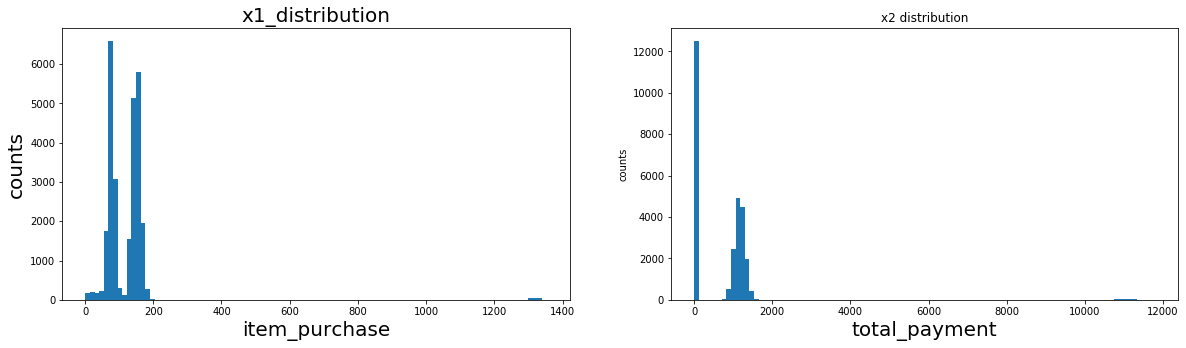

In [13]:
#coding:utf-8
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mlp
font2 = {'family' : 'DejaVu Sans',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'DejaVu Sans'
mlp.rcParams['axes.unicode_minus'] = False
fig2 = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(x1,bins=100)
plt.title('x1_distribution',font2)
plt.xlabel('item_purchase',font2)
plt.ylabel('counts',font2)
plt.subplot(122)
plt.hist(x2,bins=100)
plt.title('x2 distribution')
plt.xlabel('total_payment',font2)
plt.ylabel('counts')
plt.show()

In [14]:
#calculate the mean and sigma of x1 and x2
x1_mean = x1.mean()
x1_sigma = x1.std()
x2_mean = x2.mean()
x2_sigma = x2.std()
print(x1_mean,x1_sigma,x2_mean,x2_sigma)

122.62013164115059 97.23052260088924 692.4311756791125 966.1090003170626


In [15]:
#calculate the gaussian distribution p(x)
from scipy.stats import norm
x1_range = np.linspace(0,1400,30000)
x1_normal = norm.pdf(x1_range,x1_mean,x1_sigma)
x2_range = np.linspace(0,12000,30000)
x2_normal = norm.pdf(x2_range,x2_mean,x2_sigma)

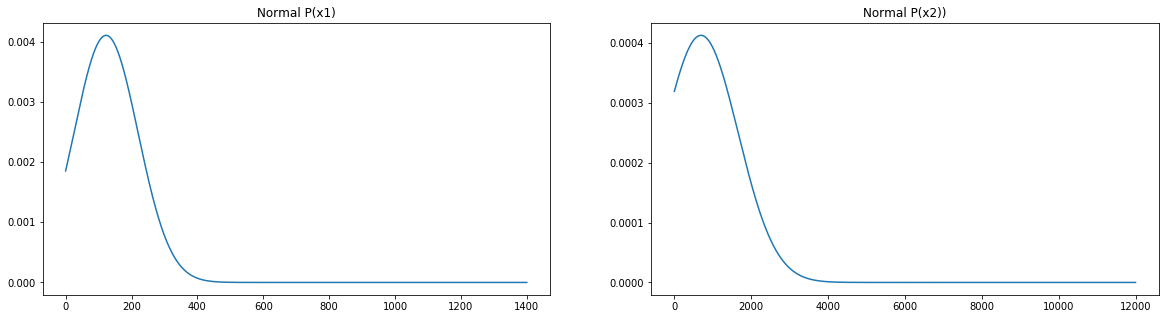

In [16]:
fig2 = plt.figure(figsize = (20,5))
plt.subplot(121)
plt.plot(x1_range,x1_normal)
plt.title('Normal P(x1)')
plt.subplot(122)
plt.plot(x2_range,x2_normal)
plt.title('Normal P(x2))')
plt.show()

In [17]:
print(x1.describe()) 

count    27499.000000
mean       122.620132
std         97.230523
min          1.000000
25%         78.000000
50%        134.000000
75%        152.000000
max       1353.000000
Name: acct_buy, dtype: float64


In [18]:
print(x2.describe()) #we can segment customers based on total spend on app/inapp purchase. $0 as one segment,and labelled 
#as free user, 0-$600 as leisure users.$601-$1100 as normal users. $1100 and above as loyal users.

count    27499.000000
mean       692.431176
std        966.109000
min          0.000000
25%          0.000000
50%        993.840000
75%       1184.535000
max      11799.750000
Name: acct_pay, dtype: float64


In [23]:
#df_st
import numpy as np
cut_points = [np.percentile(df_st['acct_pay'], i) for i in [50, 75, 90]]
df_st['customer_level'] = 1
for i in range(3):
    df_st['customer_level'] = df_st['customer_level'] + (df_st['acct_pay'] < cut_points[i])

In [24]:
df_st

,acct_id,acct_buy,acct_pay,acct_create_dt,payment_type,customer_level
2250,14d524ac4549e0af,1334,11799.75,2008-04-06,PMOF,1
17303,9fcc62e657de2a80,1329,11686.79,2009-12-02,PMOF,1
14310,8422035186298ab9,1343,11672.69,2009-11-07,PMOF,1
18007,a653983875eb1db6,1340,11664.65,2011-09-18,PMOF,1
8235,4bf5a3fdf5fddfe9,1321,11580.87,2010-02-14,PMOF,1
...,...,...,...,...,...,...
12562,7482731bf6098a54,60,0.00,2014-10-08,Free only,4
12566,748cf0027ee6ee0c,91,0.00,2014-03-30,Free only,4
12569,748eb3f917750c91,80,0.00,2016-05-08,Free only,4
12570,748ec1dcc3bc5676,84,0.00,2013-06-04,Free only,4


In [31]:
df_st['customer_level'].value_counts()

inactive_customer    13749
leisure_customer      6875
normal_customer       4125
loyal_customer        2750
Name: customer_level, dtype: int64

In [30]:
df_st.loc[df_st.customer_level == 1,'customer_level'] = 'loyal_customer'
df_st.loc[df_st.customer_level == 2,'customer_level'] = 'normal_customer'
df_st.loc[df_st.customer_level == 3,'customer_level'] = 'leisure_customer'
df_st.loc[df_st.customer_level == 4,'customer_level'] = 'inactive_customer'
df_st

,acct_id,acct_buy,acct_pay,acct_create_dt,payment_type,customer_level
2250,14d524ac4549e0af,1334,11799.75,2008-04-06,PMOF,loyal_customer
17303,9fcc62e657de2a80,1329,11686.79,2009-12-02,PMOF,loyal_customer
14310,8422035186298ab9,1343,11672.69,2009-11-07,PMOF,loyal_customer
18007,a653983875eb1db6,1340,11664.65,2011-09-18,PMOF,loyal_customer
8235,4bf5a3fdf5fddfe9,1321,11580.87,2010-02-14,PMOF,loyal_customer
...,...,...,...,...,...,...
12562,7482731bf6098a54,60,0.00,2014-10-08,Free only,inactive_customer
12566,748cf0027ee6ee0c,91,0.00,2014-03-30,Free only,inactive_customer
12569,748eb3f917750c91,80,0.00,2016-05-08,Free only,inactive_customer
12570,748ec1dcc3bc5676,84,0.00,2013-06-04,Free only,inactive_customer


In [33]:
df_st.to_csv('acct_segment.csv')

## Lets import the all_trans_data table and get the data we need for time-serires analysis


In [31]:
df_ata = pd.read_csv('All_trans_data.csv')

In [32]:
df_ata.shape

(3371931, 12)

In [33]:
#because we want to use the time serires to predict the future download trends so lets only keep the trans_create_dt and price column
cols = ['content_id','status','parent_app_id','app_name','category_id','device_id','type','acct_id','acct_create_dt','payment_type']
df_ata.drop(cols,axis=1,inplace = True)

In [34]:
df_ata = df_ata.sort_values('trans_create_dt')

In [35]:
df_ata

,trans_create_dt,price
945058,2016-06-01,0.00
273177,2016-06-01,0.99
2078376,2016-06-01,0.00
767714,2016-06-01,14.99
219232,2016-06-01,7.99
...,...,...
1892094,2016-09-21,0.99
1892032,2016-09-21,17.99
371955,2016-09-21,27.99
1892340,2016-09-21,0.99


In [8]:
df_ata.isnull().sum()#no null

trans_create_dt    0
price              0
dtype: int64

In [37]:
df_ata = df_ata.groupby('trans_create_dt')['price'].sum().reset_index()

In [10]:
df_ata = df_ata.set_index('trans_create_dt')
df_ata.index  #now we turn the index to datetime, which is known as time serires.

Index(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-04', '2016-06-05',
       '2016-06-06', '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
       ...
       '2016-09-12', '2016-09-13', '2016-09-14', '2016-09-15', '2016-09-16',
       '2016-09-17', '2016-09-18', '2016-09-19', '2016-09-20', '2016-09-21'],
      dtype='object', name='trans_create_dt', length=110)

In [11]:
df_ata.head()

,price
trans_create_dt,
2016-06-01,169076.87
2016-06-02,167777.86
2016-06-03,169004.35
2016-06-04,179815.80
2016-06-05,182077.04


In [12]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

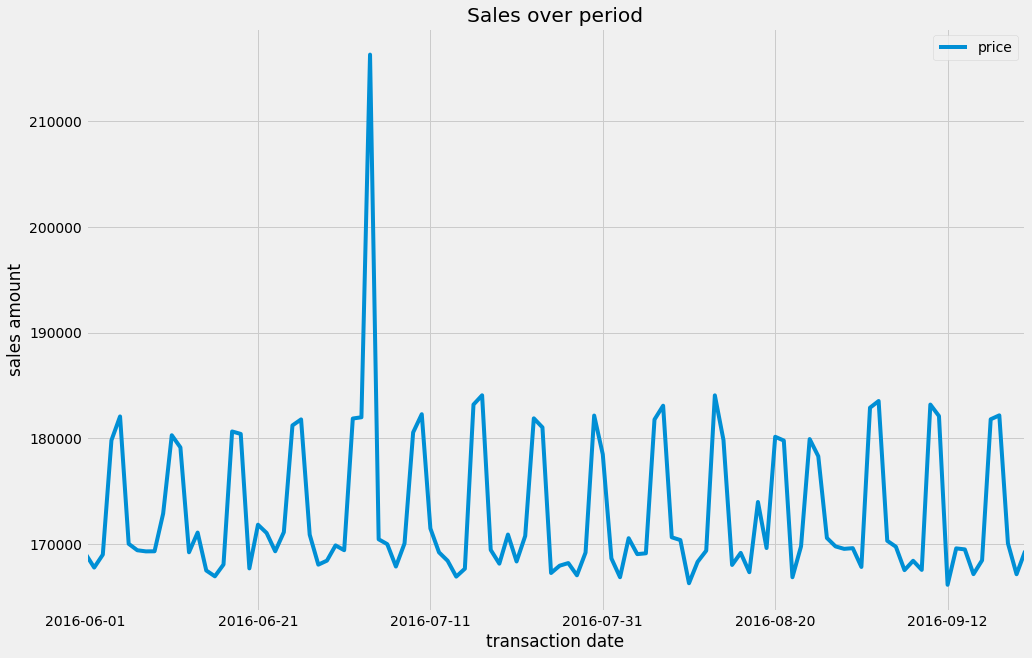

In [13]:
from matplotlib import pyplot as plt
df_ata.plot(figsize=(15, 10))
plt.title('Sales over period')
plt.xlabel('transaction date')
plt.ylabel('sales amount')
plt.show()

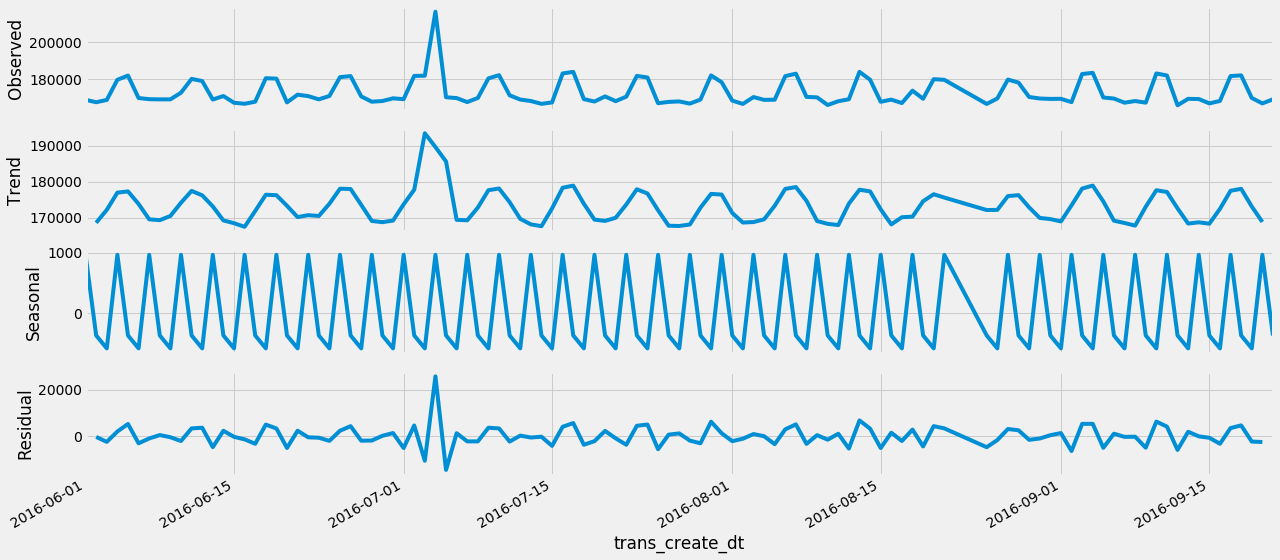

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
df_ata.reset_index(inplace=True)
df_ata['trans_create_dt'] = pd.to_datetime(df_ata['trans_create_dt'])
df_ata = df_ata.set_index('trans_create_dt')
decomposition=sm.tsa.seasonal_decompose(df_ata,freq=3,model='additive')
fig = decomposition.plot()
plt.show()

In [66]:
#lets try using prophet
from fbprophet import Prophet


In [39]:
df_ata = df_ata.rename(columns={'trans_create_dt': 'ds', 'price': 'y'})

In [89]:
df_ata

,ds,y
0,2016-06-01,169076.87
1,2016-06-02,167777.86
2,2016-06-03,169004.35
3,2016-06-04,179815.80
4,2016-06-05,182077.04
...,...,...
105,2016-09-17,181805.64
106,2016-09-18,182178.94
107,2016-09-19,170073.75
108,2016-09-20,167147.58


In [68]:
app_download_model = Prophet(interval_width=0.95)
app_download_model.fit(df_ata)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:

app_download_forecast = app_download_model.make_future_dataframe(periods=40, freq='D')
app_download_forecast = app_download_model.predict(app_download_forecast)

<Figure size 1296x432 with 0 Axes>

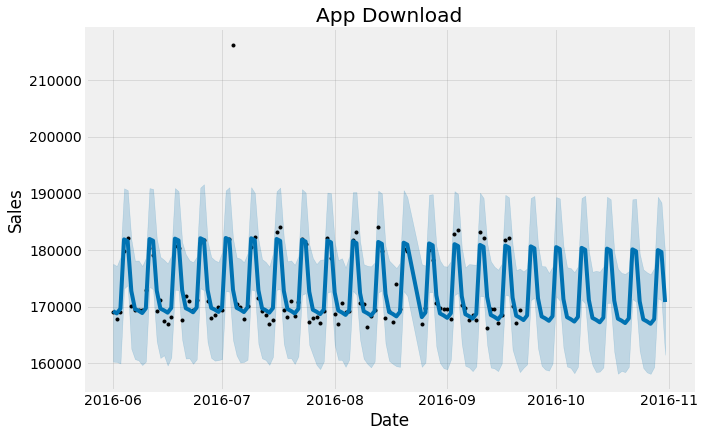

In [43]:
plt.figure(figsize=(18, 6))
app_download_model.plot(app_download_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('App Download');

In [113]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

In [117]:
y_pred = app_download_forecast['yhat']
y_true = df_ata['y']

In [118]:
print(mape(y_true, y_pred))

1.018750437581971


In [44]:
app_names = ['app_%s' % column for column in app_download_forecast.columns]
merge_app_download_forecast = app_download_forecast.copy()
merge_app_download_forecast.columns = app_names


In [45]:
forecast = merge_app_download_forecast.rename(columns={'app_ds': 'Date'})

In [46]:
forecast

,Date,app_trend,app_yhat_lower,app_yhat_upper,app_trend_lower,app_trend_upper,app_additive_terms,app_additive_terms_lower,app_additive_terms_upper,app_weekly,app_weekly_lower,app_weekly_upper,app_multiplicative_terms,app_multiplicative_terms_lower,app_multiplicative_terms_upper,app_yhat
0,2016-06-01,173301.898934,160264.211825,177544.780534,173301.898934,173301.898934,-4118.979179,-4118.979179,-4118.979179,-4118.979179,-4118.979179,-4118.979179,0.0,0.0,0.0,169182.919754
1,2016-06-02,173311.513258,160211.563377,177134.788324,173311.513258,173311.513258,-4527.590088,-4527.590088,-4527.590088,-4527.590088,-4527.590088,-4527.590088,0.0,0.0,0.0,168783.923169
2,2016-06-03,173321.127582,159952.102273,178740.877344,173321.127582,173321.127582,-3696.383400,-3696.383400,-3696.383400,-3696.383400,-3696.383400,-3696.383400,0.0,0.0,0.0,169624.744182
3,2016-06-04,173330.741906,173187.958491,190893.009610,173330.741906,173330.741906,8535.359833,8535.359833,8535.359833,8535.359833,8535.359833,8535.359833,0.0,0.0,0.0,181866.101739
4,2016-06-05,173340.356230,173756.342567,190566.749426,173340.356230,173340.356230,8212.496932,8212.496932,8212.496932,8212.496932,8212.496932,8212.496932,0.0,0.0,0.0,181552.853163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2016-10-27,171479.278458,158104.449187,175689.210247,171277.661567,171670.438394,-4527.590088,-4527.590088,-4527.590088,-4527.590088,-4527.590088,-4527.590088,0.0,0.0,0.0,166951.688369
146,2016-10-28,171460.578431,159330.644871,176792.313512,171251.243025,171658.529499,-3696.383400,-3696.383400,-3696.383400,-3696.383400,-3696.383400,-3696.383400,0.0,0.0,0.0,167764.195030
147,2016-10-29,171441.878403,171435.523897,189399.125659,171224.824482,171647.503817,8535.359833,8535.359833,8535.359833,8535.359833,8535.359833,8535.359833,0.0,0.0,0.0,179977.238236
148,2016-10-30,171423.178376,171134.103863,188374.766696,171198.015606,171638.723424,8212.496932,8212.496932,8212.496932,8212.496932,8212.496932,8212.496932,0.0,0.0,0.0,179635.675308


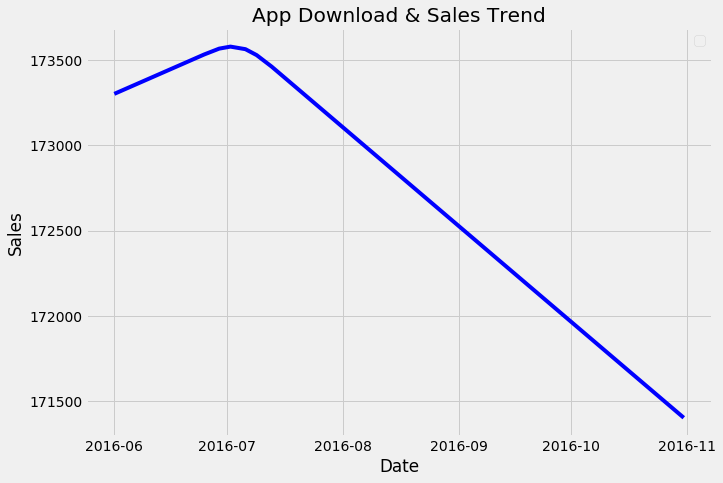

In [47]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['app_trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('App Download & Sales Trend');

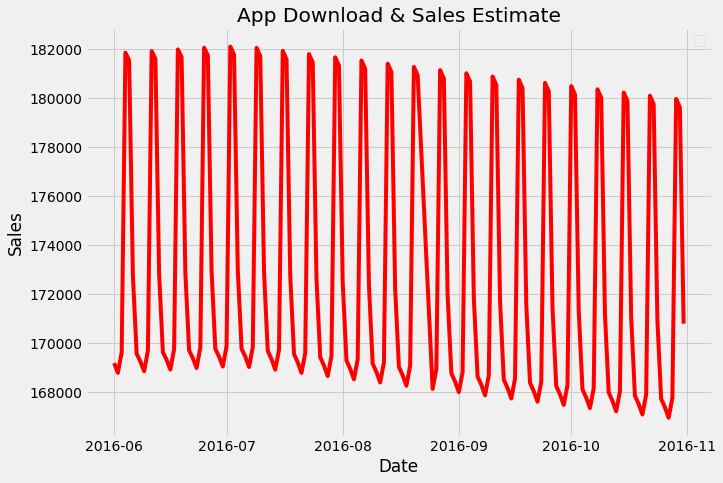

In [48]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['app_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('App Download & Sales Estimate');

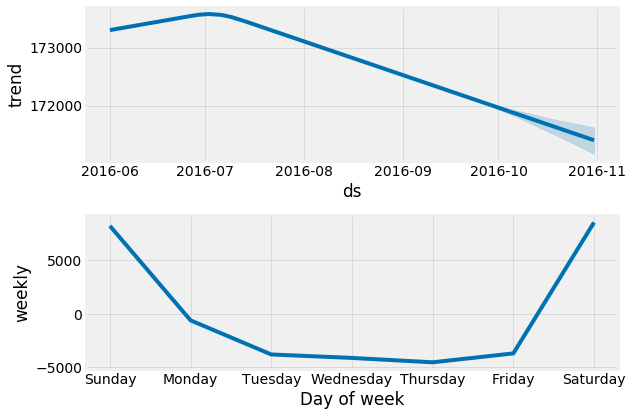

In [49]:
#Now, we can use the Prophet Models to inspect the google store app download trend of the data.
app_download_model.plot_components(app_download_forecast);


#### For second model, let’s apply some business insights to tweak the first model, and We applied: yearly_seasonality, weekly_seasonality ,holiday

In [172]:
app_download_model_2 = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,changepoint_prior_scale=2)


In [173]:
app_download_model_2.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

In [174]:
app_download_model_2.fit(df_ata)
app_download_forecast2 = app_download_model_2.make_future_dataframe(periods=40, freq='D')
app_download_forecast2 = app_download_model_2.predict(app_download_forecast2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

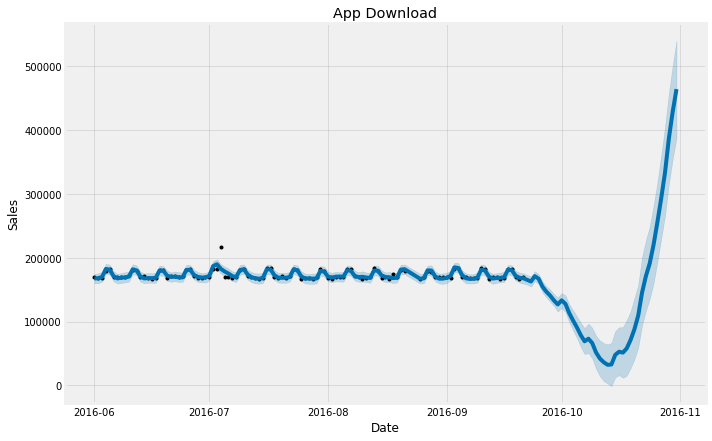

In [175]:
plt.figure(figsize=(18, 6))
app_download_model.plot(app_download_forecast2, xlabel = 'Date', ylabel = 'Sales')
plt.title('App Download');

In [176]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
y_pred_2 = app_download_forecast2['yhat']
y_true = df_ata['y']

In [177]:
print(mape(y_true, y_pred_2))

1.106913916339767


In [ ]:
forecast2 = merge_app_download_forecast.rename(columns={'app_ds': 'Date'})

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['app_trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('App Download & Sales Trend');

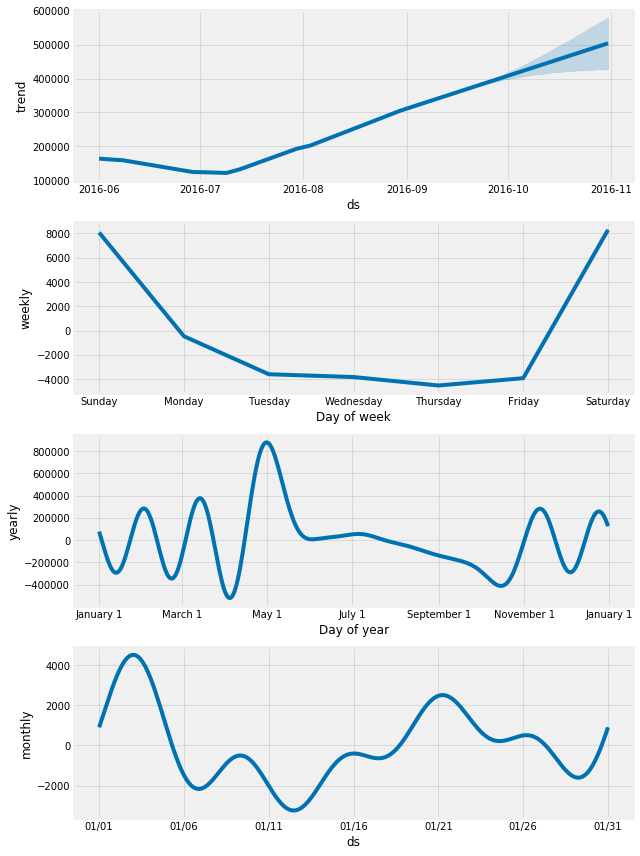

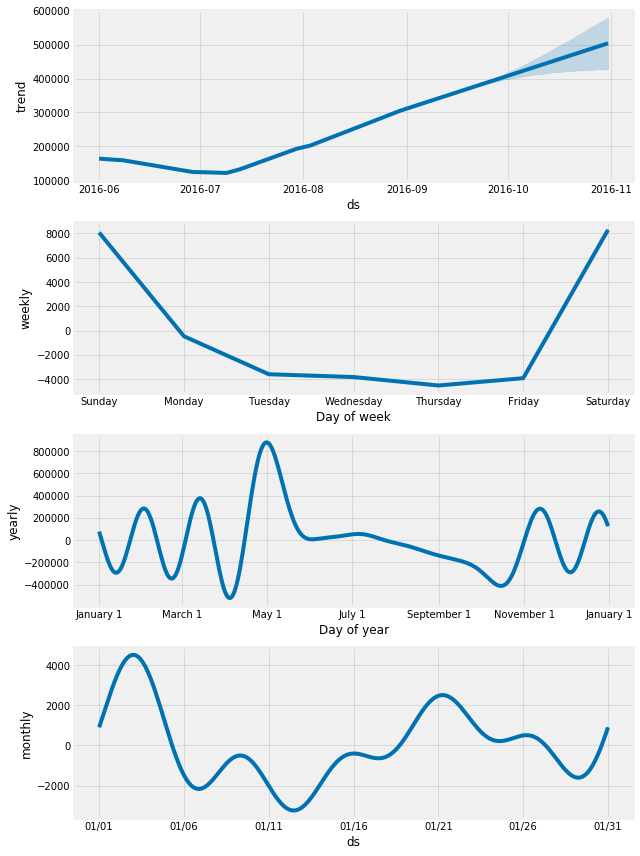

In [178]:
app_download_model_2.plot_components(app_download_forecast2)
